In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reclassified-ml/reclasified_ml/reclassified_ml.prj
/kaggle/input/reclassified-ml/reclasified_ml/reclassified_ml.shx
/kaggle/input/reclassified-ml/reclasified_ml/reclassified_ml.shp
/kaggle/input/reclassified-ml/reclasified_ml/reclassified_ml.dbf


In [12]:
import os 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import geopandas as gp
import pandas as pd
import sklearn 
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.metrics import confusion_matrix

def cl2idx(inputarr, dict_label):
    y_label = np.zeros((inputarr.shape[0] ))
    for i in range(inputarr.shape[0]):
            y_label[i] = dict_label[inputarr[i, 0]]
    return y_label



In [5]:


joind = gp.read_file("../input/reclassified-ml/reclasified_ml/reclassified_ml.shp")
 

df1 = pd.DataFrame(joind.drop(columns='geometry'))
df1 = df1.replace([np.inf, -np.inf], np.nan).dropna()
 
df_covar = df1.filter(regex='density|Dif_|EF|GLCM|LW|max_SI|mean_|mn_|num|obj|SI_|std|tot')
df_covar[df_covar>1e5] =0 
 
train_size = int(len(df1)*0.8)
X_train =df_covar [:train_size]
X_test  = df_covar  [train_size:]
Y_train  =df1.filter(regex='group_M')[:train_size]
Y_test  =df1.filter(regex='group_M')[train_size:]
Y_train= Y_train.values
Y_test = Y_test.values
 

label_all =  df1.group_M.unique()
i = 0
idx2class = {}
class2idx = {}
for tp in label_all:
    idx2class[i] = tp
    class2idx[tp] = i 
    i+= 1

 #string.ascii_lowercase

"""xgboost softmax regression"""


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


NameError: name 'dic_label' is not defined

In [13]:
 
Y_trainnum = cl2idx(Y_train, class2idx)
Y_testnum = cl2idx(Y_test, class2idx)
 
 

In [16]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=Y_trainnum)
dtest = xgb.DMatrix(X_test, label=Y_testnum)
params = {'max_depth': 6, 'eta': 0.001, 'silent': 1, 'n_estimators' : 1500,
          'objective': 'multi:softprob', 'num_class': len(np.unique(Y_train))}
# Fit
model = xgb.train(params, dtrain, 100)
# Evalute

 
 

[14:15:50] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'pandas.core.frame.DataFrame'>)

In [17]:
yhat = model.predict(dtest)
yhat_labels = np.argmax(yhat, axis=1)


array([[16544,     4,     9,     0,   266,    98,   123,    29,     5,
           52,   216],
       [  274,     2,     0,     0,     1,     1,     3,     1,     0,
            2,     1],
       [ 2821,     0,    12,     0,    99,    25,    27,     3,     7,
            4,    31],
       [  332,     1,     0,     0,   185,    78,   171,   104,     0,
           70,    11],
       [  173,     0,     0,     0,   530,    91,   121,   270,     0,
          114,    14],
       [ 1036,     2,     1,     0,   357,   201,   150,    44,     2,
           39,    56],
       [  448,     1,     0,     0,   439,    80,   287,   189,     0,
           52,    27],
       [   66,     1,     0,     0,   212,    21,    38,   258,     0,
          165,    13],
       [   54,     0,     0,     0,    24,     2,     9,    11,     0,
           15,     1],
       [    4,     0,     0,     0,   190,     0,    16,    32,     0,
          250,     7],
       [ 5093,     0,     0,     0,   653,    24,   158,    

In [18]:
cm  = confusion_matrix(Y_testnum, yhat_labels)
 

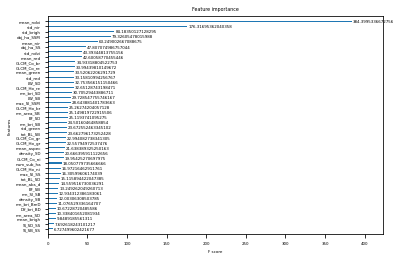

In [56]:
plt.rcParams.update({'font.size': 4})
xgb.plot_importance(model, grid=False, importance_type='gain', title='Feature importance')

fname = "obia importance"
plt.savefig(fname, dpi=1200)

 

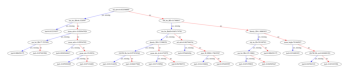

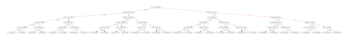

In [58]:
plt.rcParams.update({'font.size': 4})
xgb.plot_tree(model, num_trees=2)
fname = "xgb_tree2"
plt.savefig(fname, dpi=1200)

plt.rcParams.update({'font.size': 4})
xgb.plot_tree(model, num_trees=1000)
fname = "xgb_tree1000"
plt.savefig(fname, dpi=1200)


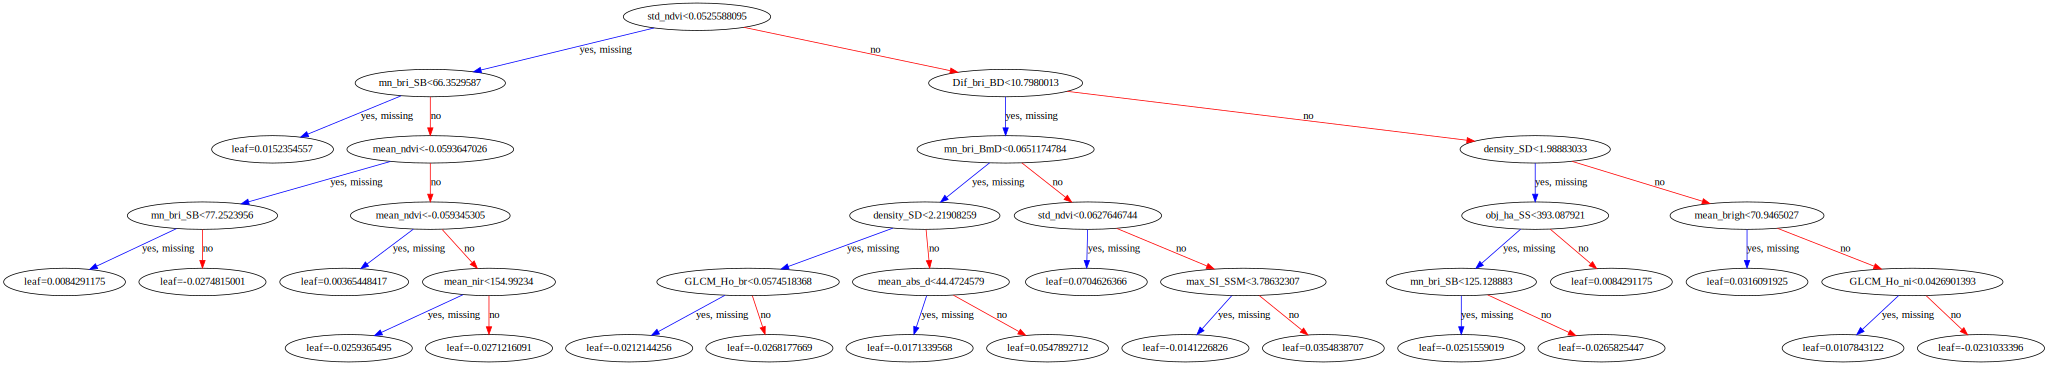

In [60]:
#xgb.to_graphviz(model, num_trees=2)

In [19]:
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


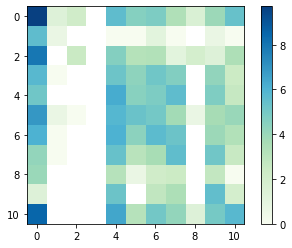

In [27]:
plt.imshow(np.log(cm), cmap=plt.get_cmap("GnBu"))
plt.colorbar()

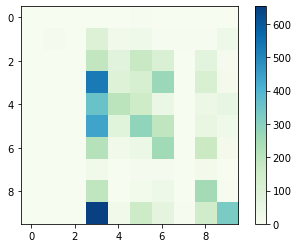

In [32]:
plt.imshow(cm[1:, 1:], cmap=plt.get_cmap("GnBu"))
plt.colorbar()

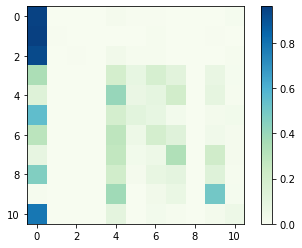

In [39]:
cm  = confusion_matrix(Y_testnum, yhat_labels,normalize='true')
plt.imshow(cm, cmap=plt.get_cmap("GnBu"))
plt.colorbar() 
# TP/ all True

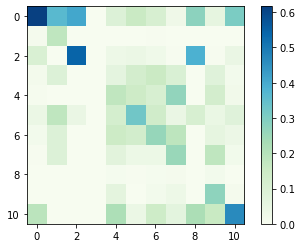

In [38]:
cm  = confusion_matrix(Y_testnum, yhat_labels,normalize='pred')
plt.imshow(cm, cmap=plt.get_cmap("GnBu"))
plt.colorbar() 
# TP/ (all predicted T), most of the times, the predictions. 